# Week 4: Support Vector Machines
#### Done by: Nigel Wee

# Q1. Apply active learning using LinearSVC on the palmer penguins dataset (features, bill_length and bill_depth) (25 marks) (15 into active learning, 10 into explaining code, put that in as a marked down cell)

In [1]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import imageio as io
import os
from datetime import datetime
from PIL import Image
from PIL import GifImagePlugin
from IPython.display import HTML, display, Image

### Import our dataset "penguins"

In [2]:
file_path = 'penguins.csv'
origdata = pd.read_csv(file_path)
origdata[:10]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [3]:
#We choose 2 features to do active learning 

k1, k2 = 'bill_length_mm', 'bill_depth_mm'
data = origdata[[k1,k2,'species']].copy()
data[:10]


,bill_length_mm,bill_depth_mm,species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,NaN,NaN,Adelie
4,36.7,19.3,Adelie
5,39.3,20.6,Adelie
6,38.9,17.8,Adelie
7,39.2,19.6,Adelie
8,34.1,18.1,Adelie
9,42.0,20.2,Adelie


### NaN values are seen above, hence they will need to be removed.

In [4]:
data = data.dropna()

In [5]:
data.shape

(342, 3)

In [6]:
print(data['species'].nunique())
print(data['species'].unique())

3
['Adelie' 'Gentoo' 'Chinstrap']


### Hence, there are a total 342 samples with 3 unique classes (Adelie, Gentoo and Chinstrap).
### We will need to:
### 1. Remove labels from some samples
### 2. Iterate through to improve SVC (active learning)

In [7]:
#Species chosen are labels

X = data[[k1, k2]] #This line creates a new variable X that contains a subset of the original data dataframe. The subset includes only two columns, k1 and k2.
y = data['species']
print('Classes:')
print(y.unique(), '\n\n\n') #This line prints the unique values in the y variable to the console. The unique() function returns an array of the unique values in the y variable.

y[y=='Adelie'] = 0
y[y=='Gentoo'] = 1 
y[y=='Chinstrap'] = 2

Classes:
['Adelie' 'Gentoo' 'Chinstrap'] 





C:\Users\alexa\AppData\Local\Temp\ipykernel_17720\96852967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Gentoo'] = 1
C:\Users\alexa\AppData\Local\Temp\ipykernel_17720\96852967.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y=='Chinstrap'] = 2


<function matplotlib.pyplot.show(close=None, block=None)>

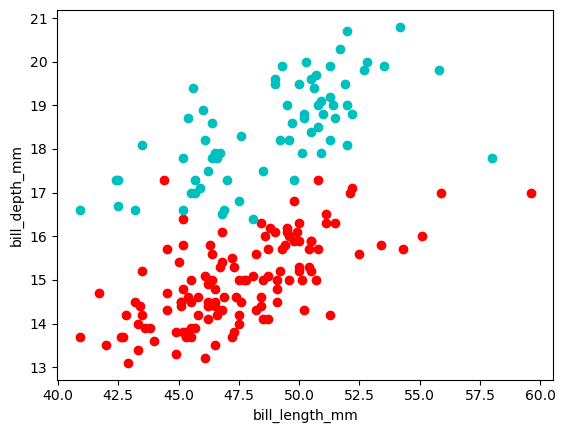

In [8]:
plt.figure() 
Adelie = y == 0 
Gentoo = y == 1
Chinstrap = y == 2
plt.scatter(X[k1][Gentoo], X[k2][Gentoo], c='r') 
plt.scatter(X[k1][Chinstrap], X[k2][Chinstrap], c='c')
plt.xlabel(k1)
plt.ylabel(k2)
plt.show

### Since we are taking on a binary classification model, filter out 1 of the 3 classes. 
### In this case, removing 'Adelie" from the dataset.

In [9]:
#Now let's discard the samples of Adelie for simplicity
X1 = X[y != 0] 
y1 = y[y != 0]
print(X1[:5]) #this returns the first 5 rows to show that we have successfully filtered off the Adelie
print('Rows start from 152 and not 0 because 0-151 indexed rows contain data for Adelie and 152-342 rows contain data for Gentoo and Chinstrap')

     bill_length_mm  bill_depth_mm
152            46.1           13.2
153            50.0           16.3
154            48.7           14.1
155            50.0           15.2
156            47.6           14.5
Rows start from 152 and not 0 because 0-151 indexed rows contain data for Adelie and 152-342 rows contain data for Gentoo and Chinstrap


In [10]:
#now we reset the indices of the dataframe
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y1 -= 1
print(y1.unique()) 
X1[:5]

[0 1]


,bill_length_mm,bill_depth_mm
0,46.1,13.2
1,50.0,16.3
2,48.7,14.1
3,50.0,15.2
4,47.6,14.5


### Basic EDA of our penguins dataset

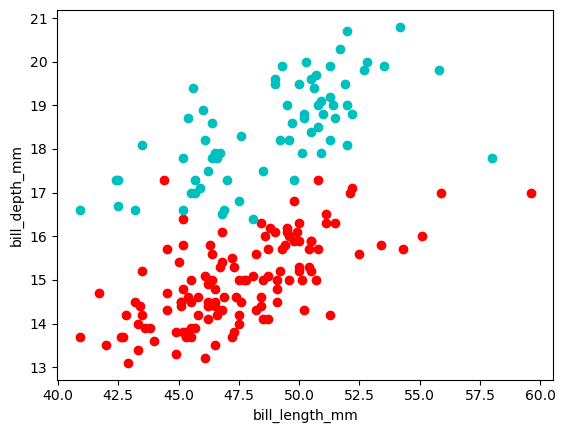

In [11]:
#Now plot data on 2D graph and save the figure as Main.jpg. This contains all the data in the dataset of versi and virginica
fig = plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c')

plt.xlabel(k1)
plt.ylabel(k2)
fig.savefig('Main.jpg', dpi=100)
plt.show()

### Fitting of our data to a linear SVM classifier using LinearSVC(), key features of the fitted SVM will be:
### 1. Coefficient of the linear line (gradient or slope) -> indicates positive or negative correlation with target label
### 2. Intercept of y-axis -> adds a baseline prediction value


In [12]:
#Training of Linear SVM on entire data to get SVM model when using all the data. LinearSVM means that the hyperplane is a straight line separating the classes
#LinearSVM should return a model characterised by its slope and intercept
#clf0 is the trained SVM classifier

y1 = y1.astype(dtype=np.uint8) #This line changes the data type of the y1 variable to unsigned 8-bit integers (np.uint8) to reduce the memory usage of variable y1

clf0=LinearSVC() #This line creates a new instance- a LinearSVC class, which is an implementation of the SVM
clf0.fit(X1, y1) #This line trains the clf0 classifier on the subset of the data specified by X1 and y1. This means that the X1 variable contains the features of the dataset, while the y1 variable contains the corresponding labels for each data point.
#Now parse in the default arguments of the LinearSVC class, showing the default hyperparameters which can be modified
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='square_hinge', max_iter=1000, multi_class='ovr', penalty='12', random_state=None, tol=0.0001, verbose=0)

print(clf0.coef_) #This line prints the coefficients of the linear model learned by the LinearSVC classifier. These coefficients indicate the weights assigned to each feature in the dataset. A positive coefficient indicates that the feature is positively correlated with the target label, while a negative coefficient indicates a negative correlation.
print(clf0.intercept_) #This line prints the intercept of the linear model learned by the clf0 classifier. The intercept is the value added to the weighted sum of the features to obtain the final prediction. It can be thought of as a baseline prediction value.

[[-0.24942311  0.75565199]]
[-0.69719292]


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Plotting of our decision boundary. In this case, this boundary will be a linear line as defined above. Hence we will compare as we implement active learning back to this line (which is our optimised linear decision boundary).

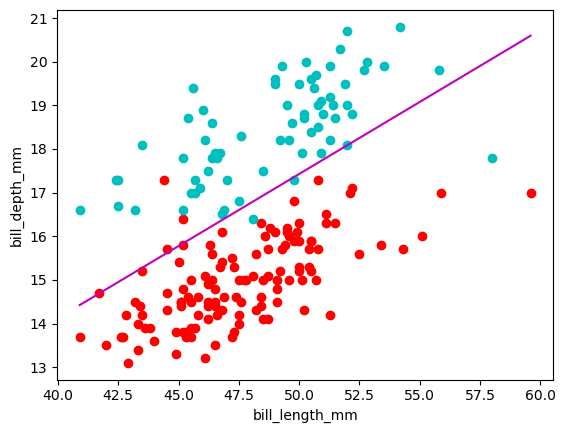

In [13]:
#Now we plot the decision boundary hyperplane. clf0.coef_ and clf0.intercept_ will define the coefficients. a0, b0, c0 are the coefficients of the line
#Linear equation: a0*x + b*0y + c0 = 0 or y = -(a0*x+c0)/b0
#We then get 100 points on this line (lx0 has the x coordinatesl ly0 has the y-coordinates) and plot them in a magenta line. This is the 'Ideal Decision Boundary' according to the LinearSVM, may not be true for other SVM kernels
#Then we plot all the points in the dataset in cyan and red defined by their class

xmin, xmax = X1[k1].min(), X1[k1].max()  
ymin, ymax = X1[k2].min(), X1[k2].max() 
stepx = (xmax - xmin)/99  
stepy = (ymax - ymin)/99
a0, b0, c0 = clf0.coef_[0, 0], clf0.coef_[0, 1], clf0.intercept_ #2 features = shape of (1,2) for coef_; so coef_[class,feature]. There is only 1 class, flowers, and 2 different features length and width
# Formula for reference
# a*x + b*y + c = 0
# y = -(a*x + c)/b

lx0 = [xmin + stepx * i for i in range(100)] #This line basically creates your x axis; creates a list of 100 evenly spaced x values within the range of x values of the dataset, stepping up from xmin
ly0 = [-(a0*lx0[i] + c0)/b0 for i in range(100)] #this is the equation above

plt.figure()

plt.scatter(X1[k1][y1==0], X1[k2][y1==0], c='r')
plt.scatter(X1[k1][y1==1], X1[k2][y1==1], c='c')

plt.plot(lx0, ly0, c='m')

plt.xlabel(k1)
plt.ylabel(k2)

plt.show() 

In [14]:
#Now we split dataset into two parts pool 80 % and test 20 %. Random state = 1. Split of dataset is dependent on random state

X_pool, X_test, y_pool, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_pool, X_test, y_pool, y_test = X_pool.reset_index(drop=True), X_test.reset_index(drop=True), y_pool.reset_index(drop=True), y_test.reset_index(drop=True)
# random state 1 5 iterations
# random state 2 20 iterations

### Testing the fitted decision function on 2 data points, where the output will essentially tell us if the data point is on the positive or negative side of the decision boundary. If the value is 0, then it will mean that the data point is lying on the decision boundary itself. 
### This output is the distance of the data point from the decision boundary.

In [15]:
#Applying decision function of LinearSVM on 2 data points (rows 6 and 7, unlabelled because only X_pool). So for binary classification linear SVM, decision function outputs positive values for one of the classes and negative values for the other class and 0 on the decision hyperplane
#For linear SVM, magnitude of decision function is = to distance of the data point from the decision function 

clf0.decision_function(X_pool.iloc[6:8])

array([-1.64362752, -1.48289966])

In [16]:
#Could be that decision function has a negative value for one of the points and a positive value for the other point, else change random state
#function find_most_ambiguous gives point that is the most ambiguous
#For an SVM classifier, if data point is farther from the decision boundary, no matter which side of the decision boundary the point is on. So, find_most_ambiguous, gives the unlabelled point that is the closest to the decision boundary

def find_most_ambiguous(clf, unknown_indexes): #here we start to define a find_most_ambiguous function which takes in the arguments clf and unknown_indexes. Remember the part on "how to choose your next dataset to label smartly"?
    ind = np.argmin(np.abs( 
        list(clf0.decision_function(X_pool.iloc[unknown_indexes]) ) #so out of the X_pool, we take out the unlabelled instances and parse them into the "decision_function" (see above cell). iloc helps us specify which the rows (arguments) that we want to parse into the "decision_function", which in this case are the "unknown_indexes" 
        )) #the decision function will return a scalar which is the distance of that point from the decision hyperplane. Sign sensitive; positive means it is on one side and vice versa. Magnitude represents confidence it is in one class or the other. You want to choose the point with the least confidence
    return unknown_indexes[ind] #basically a list of the most ambiguous datapoint

### Our defined plotting function where importantly the optimal decision boundary is being plotted with the current iteration of the active learning decision boundary. This function will plot for each iteration as seen later.

In [17]:
#plot_svm is a new function, defined to plot the following:
#SVM decision boundary, data points from the trian data according to their class and the data points in the unknown pool of samples
#plot_svm takes in 6 arguments, clf (the SVM model), train_indexes (the indices of the training set), unknown_indexes (the indices of the ambiguous set), new_index (an optional argument that specifies the index of a new sample to plot), title (an optional argument that specifies the title of the plot), and name (an optional argument that specifies the filename to save the plot to).
#So in this function, first we get the trained data (X_train, y_train) and the unlabelled data X_unk, y_unk) from the train_indexes
#Plot all unlabelled points from the pool in black. And plot all points from the train data in different colours (red and cyan) per their class 
#We then get the coeffiecients of the decision boundary from the clf.coef_ and clf.intercept_. And we plot the decision hyperplane (in green); Green is the decision boundary using the small labelled subset, magenta is the ideal decision boundary using all the data
#Finally we plot the new_index point which is the most ambiguous point (yellow star)

def plot_svm(clf, train_indexes, unknown_indexes, new_index=False, title=False, name=False):
    X_train = X_pool.iloc[train_indexes]
    y_train = y_pool.iloc[train_indexes]
    X_unk = X_pool.iloc[unknown_indexes]

    if new_index:
        X_new = X_pool.iloc[new_index]

    a, b, c = clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_

    lx = [xmin + stepx * i for i in range(100)]
    ly = [-(a*lx[i] + c)/b for i in range(100)]

    fig = plt.figure(figsize=(9,6))

    plt.scatter(X_unk[k1], X_unk[k2], c='k', marker='.')
    plt.scatter(X_train[k1][y_train==0], X_train[k2][y_train==0], c='r', marker='o')
    plt.scatter(X_train[k1][y_train==1], X_train[k2][y_train==1], c='c', marker='o')

    plt.plot(lx, ly, c='m')
    plt.plot(lx0, ly0, '--', c='g')

    if new_index:
        plt.scatter(X_new[k1], X_new[k2], c='y', marker="*", s=125)

    if title:
        plt.title(title)

    plt.xlabel(k1)
    plt.ylabel(k2)

    if name:
        fig.set_size_inches((9,6))
        plt.ylim(min(X_pool[k2]), max(X_pool[k2]))  # Set y-axis limits here
        plt.savefig(name, dpi=100)

    plt.show()

    


### For our intial iteration of the active learning that is about to be done, 10 data points are being taken to plot our intial decision boundary as seen below:

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


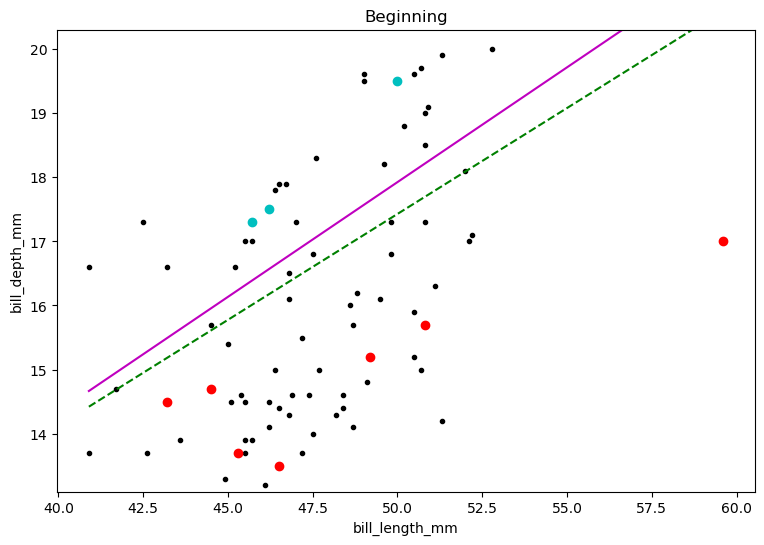

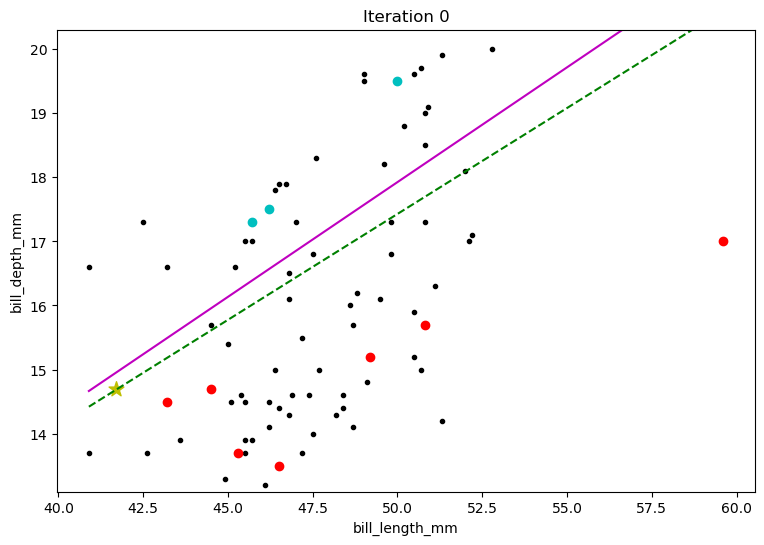

In [18]:
#Taking the first 10 indices or data points of the pool as the initial train data and the rest of the 70 data points as unlabelled samples, we create the beginning plot with all the unlabelled samples and the ideal decision boundary, and the 10 train data points
#Then we train a linear SVM on the train data, and we find the most ambiguous point and create a new plot named 'Iteration 0' with this point as a yellow star and also plot the decision boundary of the trained SVM

train_indexes = list(range(10)) #Creates a list of 0-9 called train_indexes
unknown_indexes = list(range(10, 80)) #Creates a list of 10-79 called unknown_indexes
X_train = X_pool.iloc[train_indexes] #define X and y_train
y_train = y_pool.iloc[train_indexes]
clf = LinearSVC()
clf.fit(X_train, y_train) #We use the train_indexes as labelled samples to train our initial LinearSVM

# folder = "rs1it5/"
folder = "rs2it20/"  #Assigns the string "rs2it20/" to the variable folder
# folder = "rs1it20/"

try:
    os.mkdir(folder) 
except:
    pass #Attempts to create a directory named folder and if it already exists, does nothing.

filenames = ["ActiveLearningTitleSlide2.jpg"] * 2 #Creates a list of two identical strings "ActiveLearningTitleSlide2.jpg" and assigns it to the variable filenames.

title = "Beginning" #Assigns the string "Beginning" to the variable title.
# name = folder + ("rs1it5_0a.jpg")
name = folder + ("rs2it20_0a.jpg") 
plot_svm(clf, train_indexes, unknown_indexes, False, title, name) #We call the function defined above, here

filenames.append(name) #Adds the string 'name' to the end of the list filenames.

n = find_most_ambiguous(clf, unknown_indexes) #Finds the index of the most ambiguous sample in unknown_indexes using the classifier clf and assigns it to the variable n.
unknown_indexes.remove(n) #Remove n from the unlabelled data

title = "Iteration 0"
name = folder + ("rs1it5_0b.jpg")
# name = folder + ("rs2it20_0b.jpg")
filenames.append(name)
plot_svm(clf, train_indexes, unknown_indexes, n, title, name) #This is where you put the ambiguous datapoint 'n' to determine the new hyperplane

### Hence, we can do active learning for 20 iterations where importantly we are selecting the next data point which will give us the most information which will minimise the labelling effort. Thereby, reducing the model's uncertainty the fastest with respect to number of labelled data points. 
### This is essentially achieved by selecting the closest data point to the current decision boundary as seen below:

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


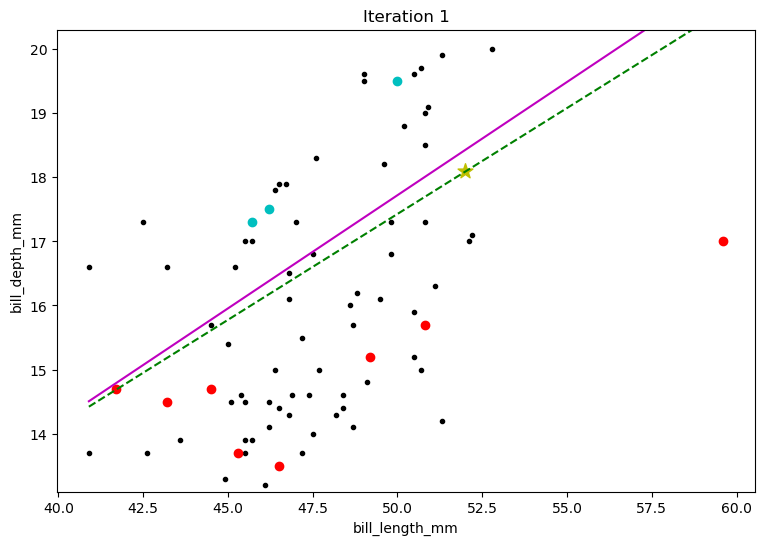

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


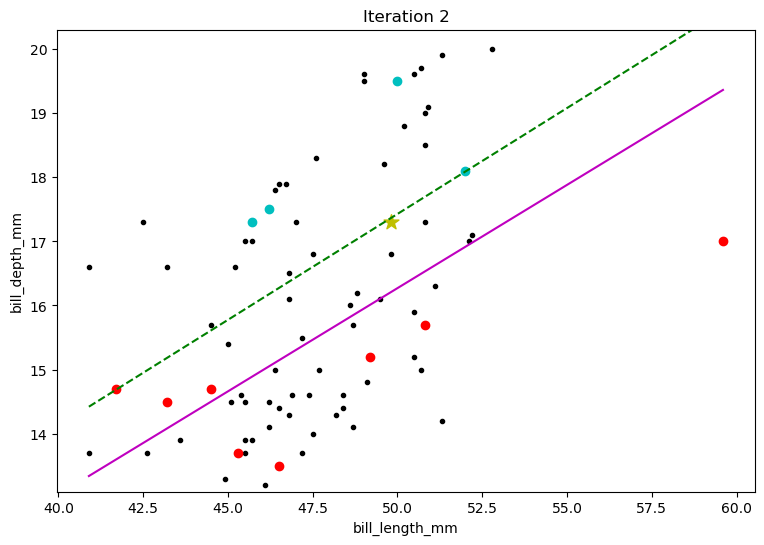

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


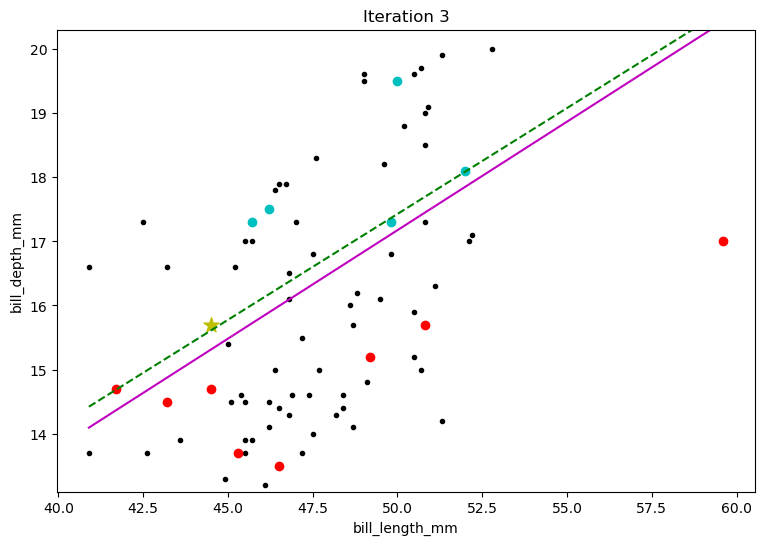

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


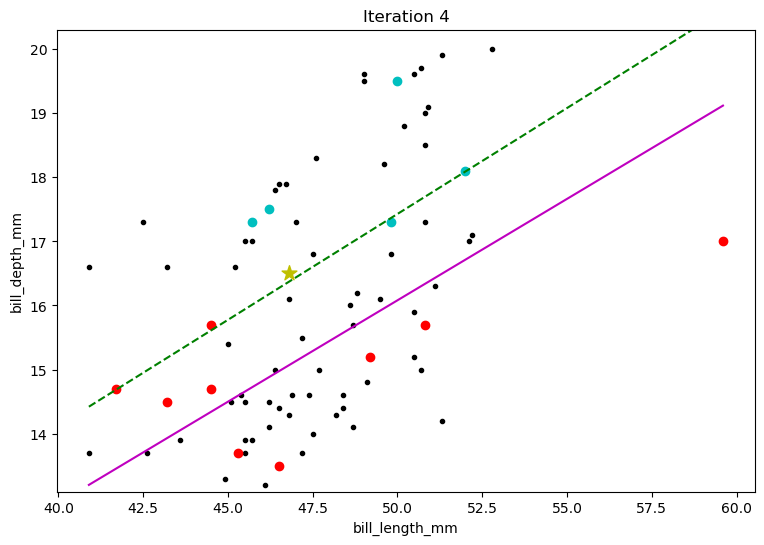

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


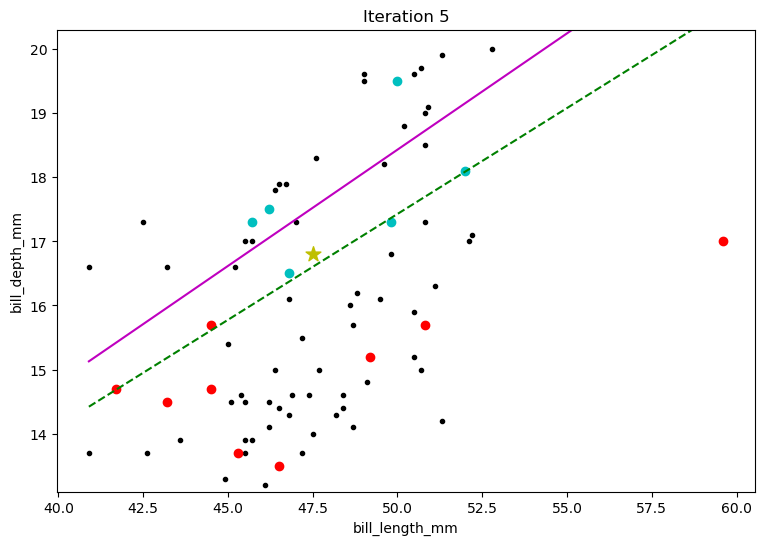

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


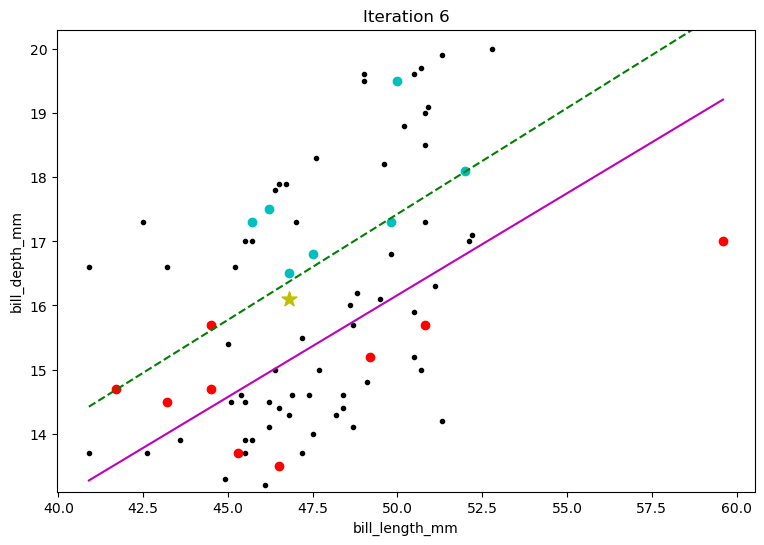

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


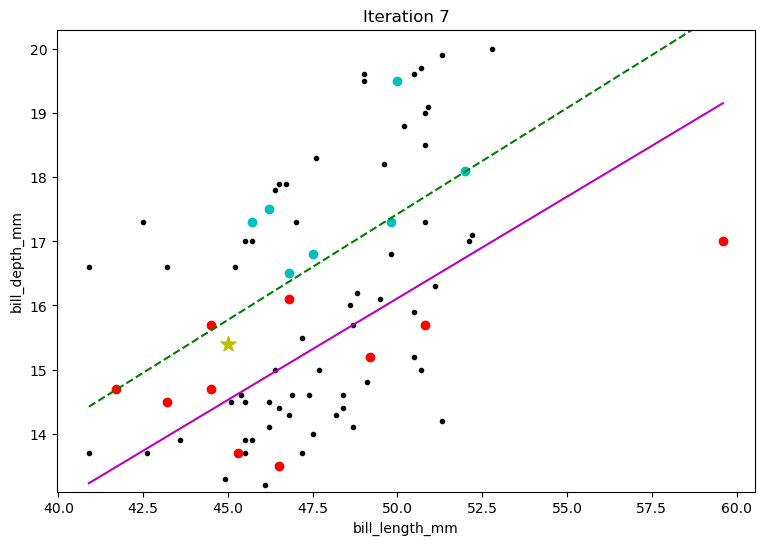

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


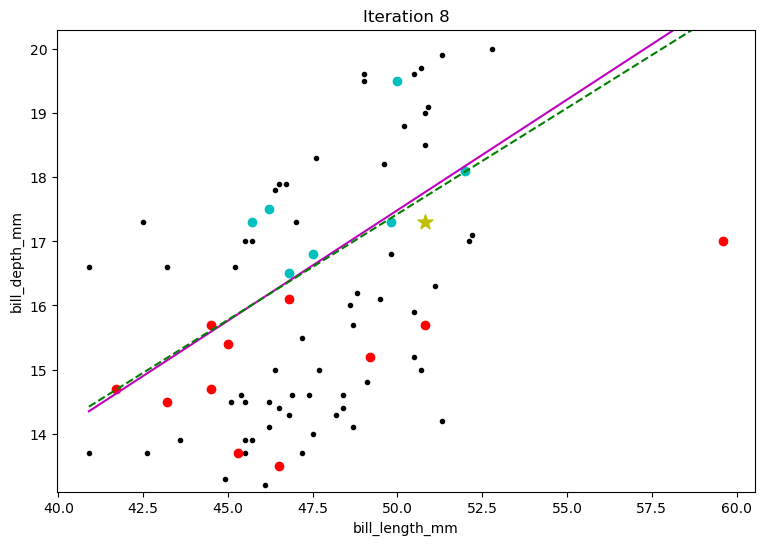

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


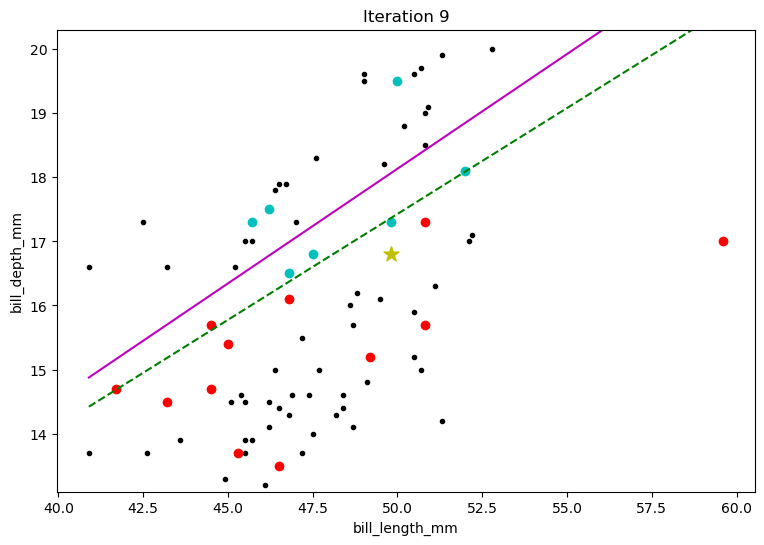

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


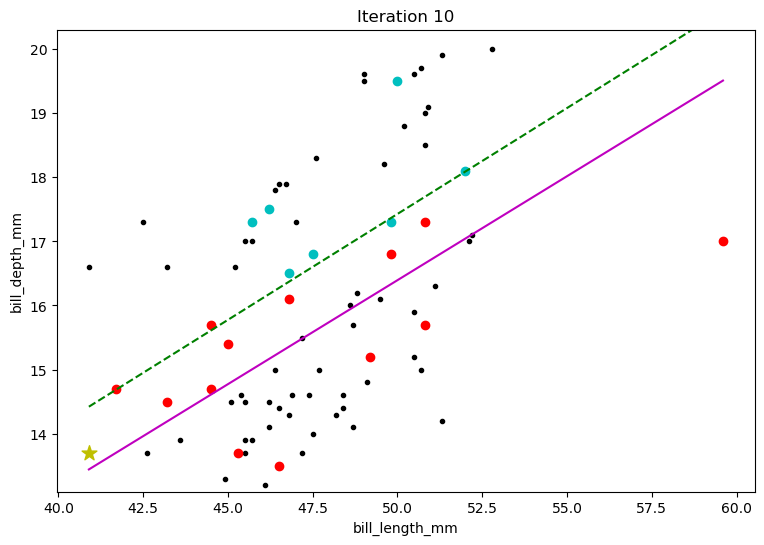

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


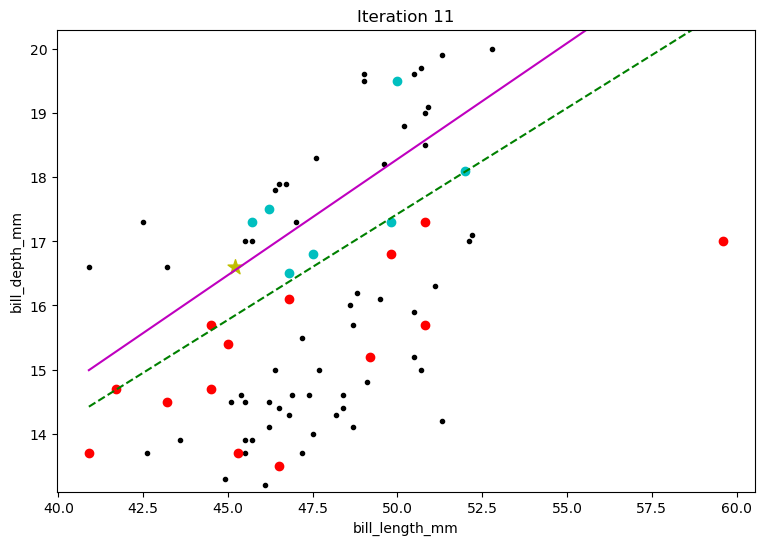

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


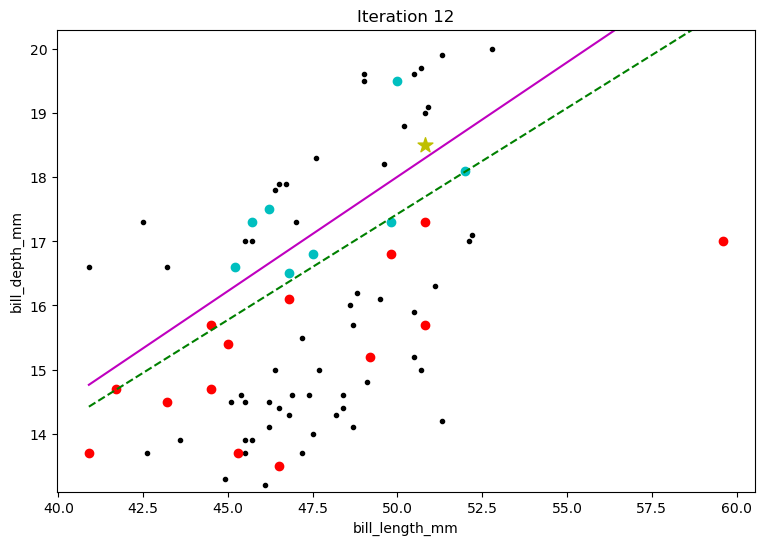

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


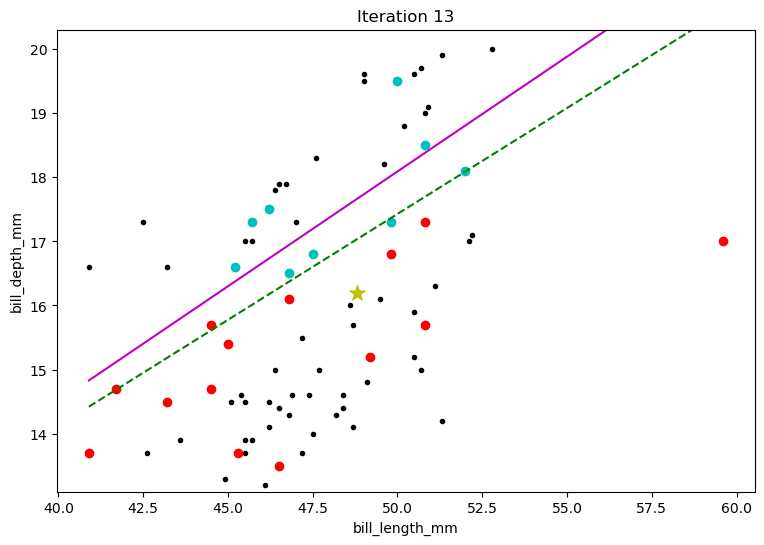

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


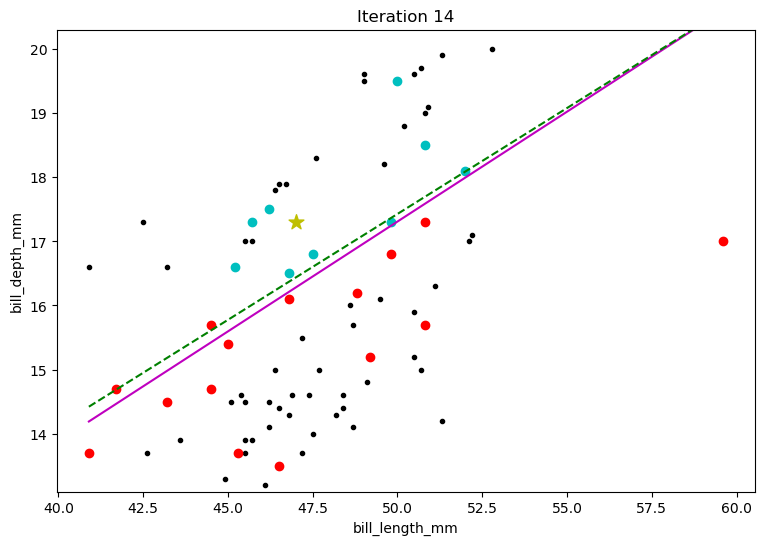

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


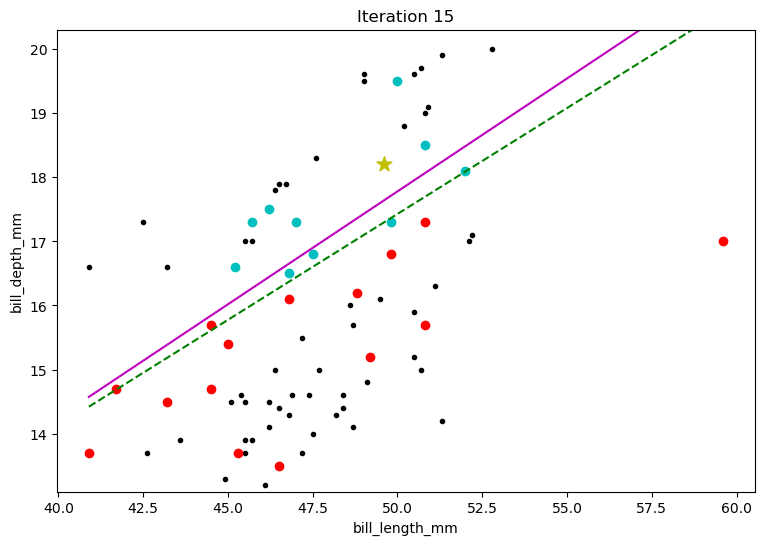

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


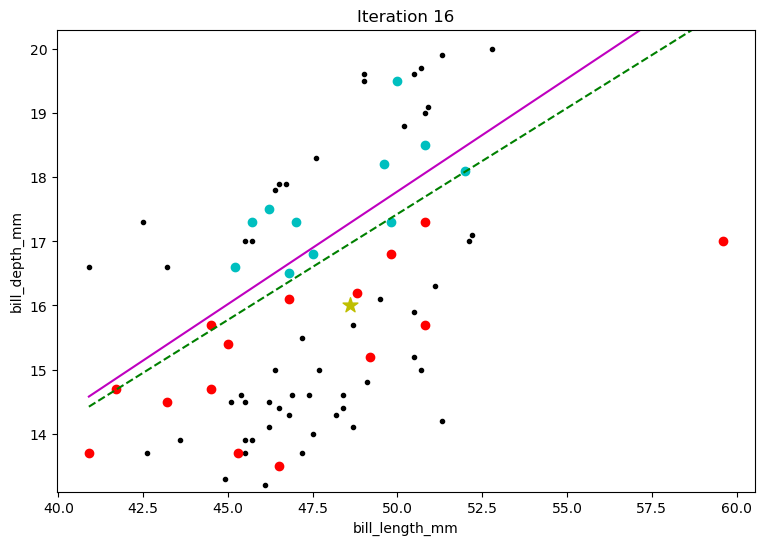

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


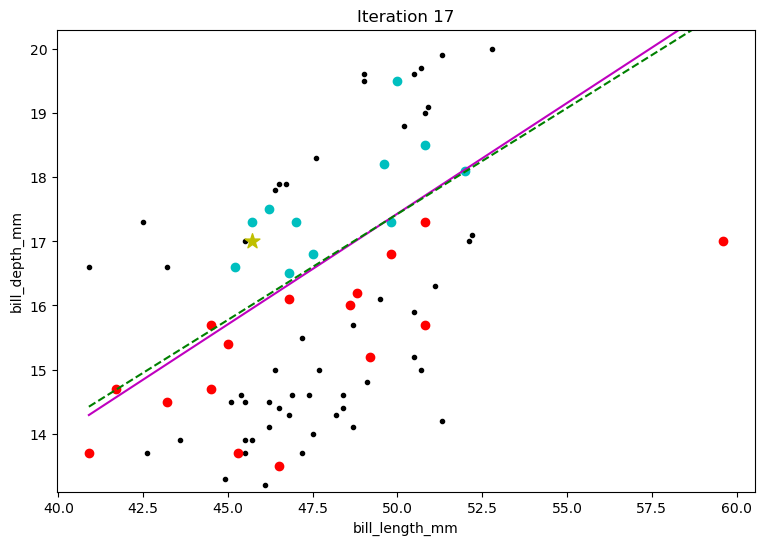

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


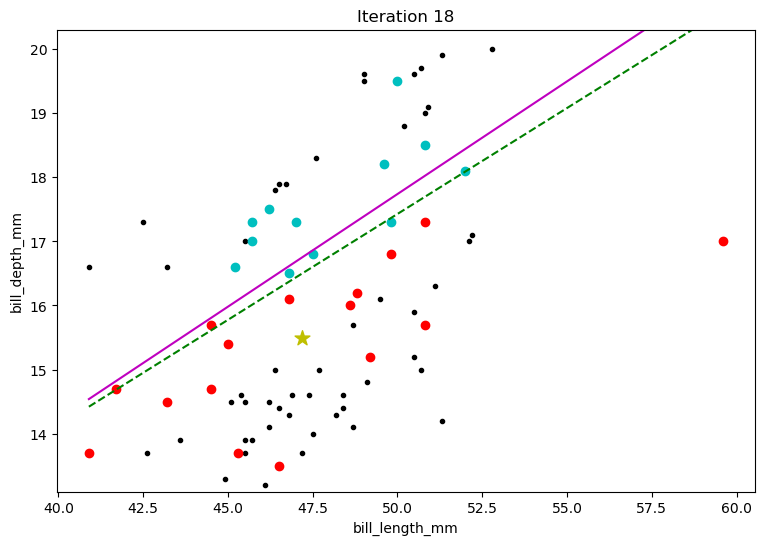

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


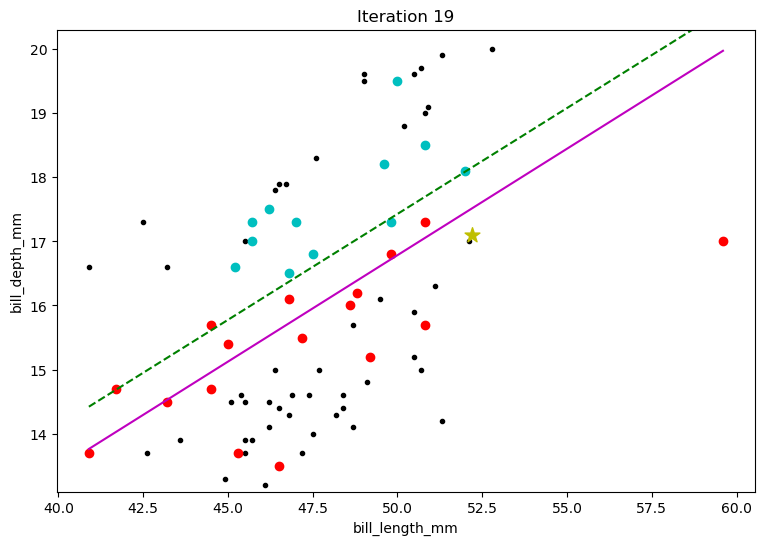

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


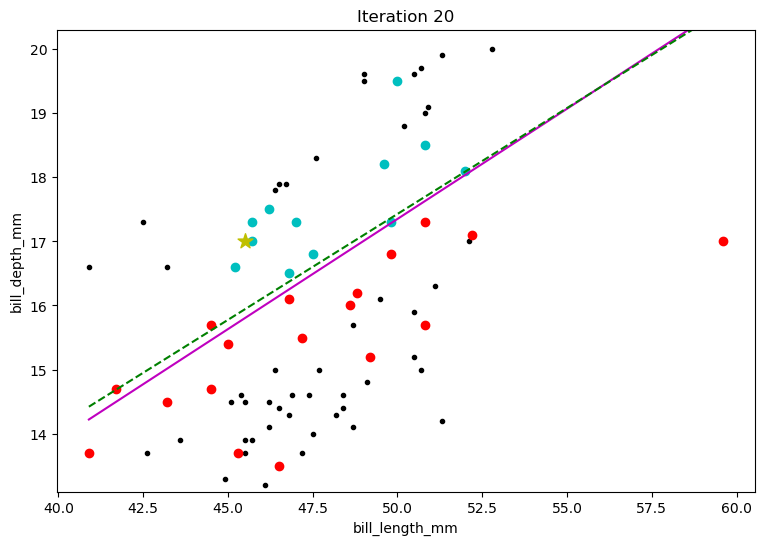

In [19]:
#Thereafter, we run the active learning algo for 5 iterations. In each of them, we add the mist ambiguous point to the training data and train a linear SVM, then find the most ambiguous point at this stage and then create a plot

num = 20 
# num = 20
t = [] #initialise a new list 't'
for i in range(num): #The for loop iterates num times, starting from 0 and ending at num-1.
    train_indexes.append(n) #in each iteration, n is appended to train_indexes
    X_train = X_pool.iloc[train_indexes] #Assigning X_train, the rows of X_pool corresponding to the train_indices. Basically you find the most ambiguous unlabelled, label it
    y_train = y_pool.iloc[train_indexes]
    clf = LinearSVC()
    clf.fit(X_train, y_train) #LinearSVC classifier is created and fitted using X_train and y_train
    title, name = "Iteration "+str(i+1), folder + ("rs1it5_%d.jpg" % (i+1))
    # title, name = "Iteration "+str(i+1), folder + ("rs2it20_%d.jpg" % (i+1))

    n = find_most_ambiguous(clf, unknown_indexes)
    unknown_indexes.remove(n)
    plot_svm(clf, train_indexes, unknown_indexes, n, title, name)
    filenames.append(name)

### Let's save our 20 iterations as images so that we can generate a gif showing the changes in decision boundary as a function of iteration number.

In [20]:
# Set the directory path where the images are located
dir_path = "rs2it20/"

# Create a list of all the image file names in the directory with their modification time
image_info = [(image_name, os.path.getmtime(os.path.join(dir_path, image_name))) for image_name in os.listdir(dir_path)]

# Sort the image file names based on modification time
image_info_sorted = sorted(image_info, key=lambda x: x[1])

# Extract the sorted image file names
image_names_sorted = [info[0] for info in image_info_sorted]

# Create an empty list to store the image data
images = []

# Loop through the sorted image file names and append the image data to the list
for image_name in image_names_sorted:
    # Construct the full file path for the image
    image_path = os.path.join(dir_path, image_name)
    # Read the image data and append it to the list
    images.append(io.imread(image_path))

# Save the list of images as a GIF
output_file = "rs2it20.gif"
io.mimsave(output_file, images, duration=0.5)


C:\Users\alexa\AppData\Local\Temp\ipykernel_17720\286484865.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(io.imread(image_path))


### Displaying our generated gif of the 20 iterations

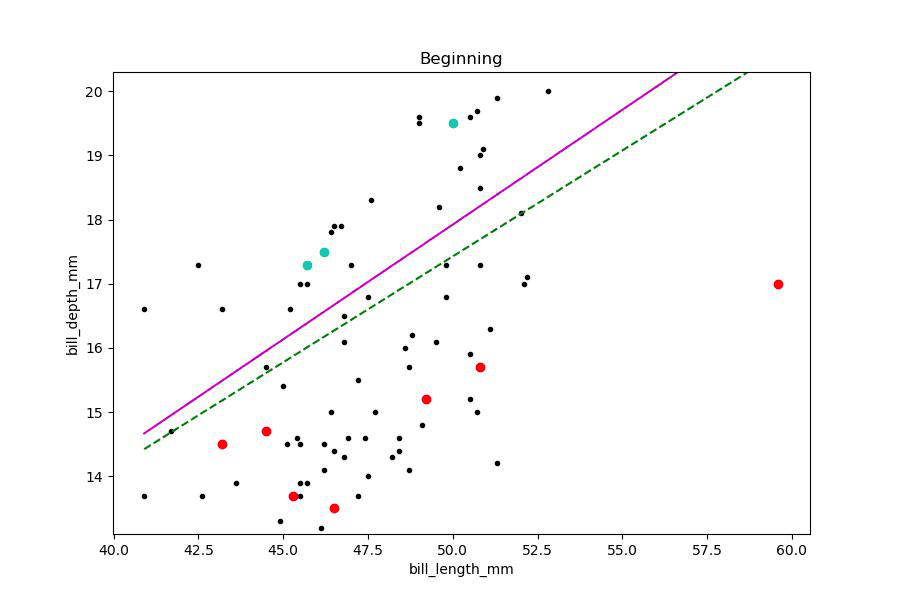

In [21]:
# Set the path to your GIF file
gif_path = "rs2it20.gif"

# Display the GIF
display(Image(filename=gif_path))

# Q2. Apply SVM on the make_moons dataset (25 marks). Use at least 2 kernel methods in your SVM (plot the decision boundaries and the datapoints (15 marks), explain which SVC kernel and hyperparameters you think is best hyperparameters, 10 marks)

In [22]:
from sklearn.datasets import make_moons

# Generate a moons dataset with 100 samples and noise level of 0.2
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Create a DataFrame from the features and target
df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['target'] = y

# Display the first few rows of the DataFrame
df[:10]

,feature1,feature2,target
0,1.645654,-0.536487,1
1,0.113649,0.569574,1
2,0.757790,-0.339259,1
3,-1.146562,0.231257,0
4,-0.655267,0.090329,0
5,-0.611413,0.943414,0
6,0.251177,0.650324,0
7,1.410734,-0.454692,1
8,0.894973,0.745335,0
9,0.844060,-0.168779,0


In [23]:
#We choose 2 features to do active learning 

k1, k2 = 'feature1', 'feature2'
data = df[[k1,k2,'target']].copy()
data[:10]

,feature1,feature2,target
0,1.645654,-0.536487,1
1,0.113649,0.569574,1
2,0.757790,-0.339259,1
3,-1.146562,0.231257,0
4,-0.655267,0.090329,0
5,-0.611413,0.943414,0
6,0.251177,0.650324,0
7,1.410734,-0.454692,1
8,0.894973,0.745335,0
9,0.844060,-0.168779,0


In [24]:
print(data['target'].nunique())
print(data['target'].unique())

2
[1 0]


In [25]:
X = data[[k1, k2]] 
y = data['target']
print('Classes:')
print(y.unique(), '\n\n\n') 

Classes:
[1 0] 





### Basic EDA of our moons dataset

<function matplotlib.pyplot.show(close=None, block=None)>

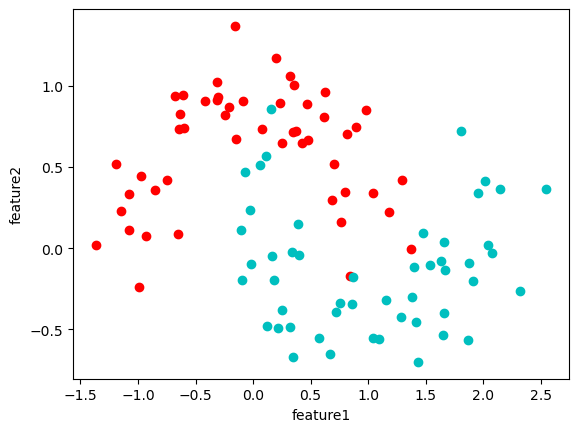

In [26]:
plt.figure() 
moon_0 = y == 0 
moon_1 = y == 1

plt.scatter(X[k1][moon_0], X[k2][moon_0], c='r') 
plt.scatter(X[k1][moon_1], X[k2][moon_1], c='c')
plt.xlabel(k1)
plt.ylabel(k2)
plt.show

### Some observations:
### From the plotted datapoints, it can be clearly seen that having a linear decision boundary will be insufficient for a respectable accuracy.
### Hence, implementing kernal trick can be done to improve our SVC accuracy.
### In this case, let's visually explore radial basis function (RBF) and polynomial (degree=2, 3) kernals.

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


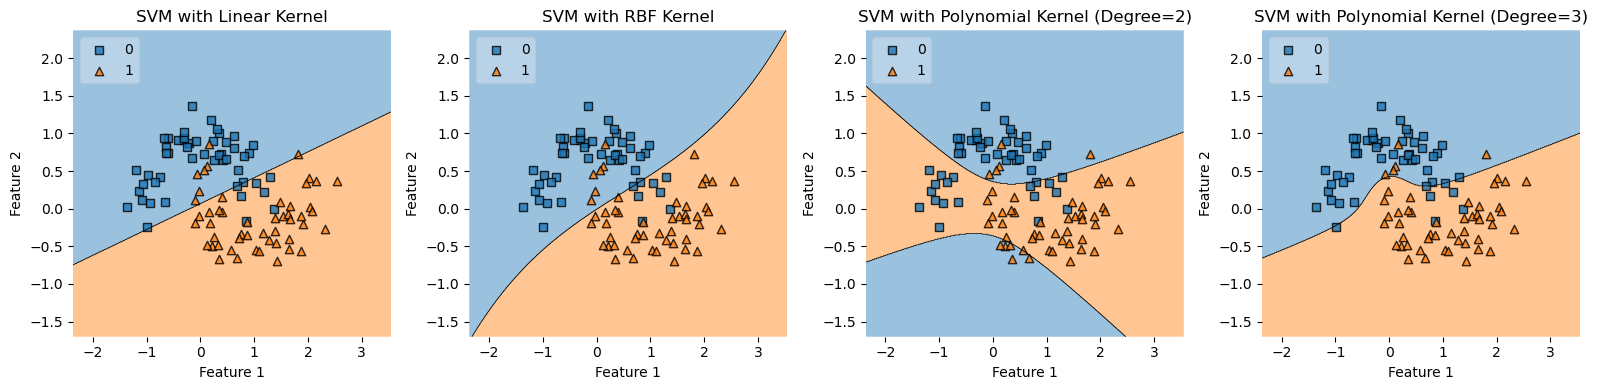

In [27]:
from mlxtend.plotting import plot_decision_regions

# Create an SVM model with a linear kernel
svm_linear = LinearSVC()
svm_linear.fit(X, y)

# Create an SVM model with a radial basis function (RBF) kernel
svm_rbf = SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X, y)

# Create an SVM model with a polynomial kernel of degree 2
svm_poly2 = SVC(kernel='poly', degree=2)
svm_poly2.fit(X, y)

# Create an SVM model with a polynomial kernel of degree 3
svm_poly3 = SVC(kernel='poly', degree=3)
svm_poly3.fit(X, y)

# Plot decision boundaries for all four models
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plot_decision_regions(X.values, y.values, clf=svm_linear, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Linear Kernel')

plt.subplot(1, 4, 2)
plot_decision_regions(X.values, y.values, clf=svm_rbf, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel')

plt.subplot(1, 4, 3)
plot_decision_regions(X.values, y.values, clf=svm_poly2, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel (Degree=2)')

plt.subplot(1, 4, 4)
plot_decision_regions(X.values, y.values, clf=svm_poly3, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel (Degree=3)')

plt.tight_layout()
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each SVM kernel
param_grid_linear = {'C': [0.001, 0.1, 1, 10]}
param_grid_rbf = {'C': [0.001, 0.1, 1, 10], 'gamma': [5, 0.1, 0.01, 0.001]}
param_grid_poly = {'C': [0.001, 0.1, 1, 10], 'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Initialize GridSearchCV for each kernel 
# Importanly, include our cross-validation to prevent overfitting of our hyperparameters!
grid_linear = GridSearchCV(LinearSVC(), param_grid_linear, cv=5)
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5)

# Fit the GridSearchCV objects to the data
grid_linear.fit(X, y)
grid_rbf.fit(X, y)
grid_poly.fit(X, y)

# Get the best hyperparameters and best score for each kernel
best_params_linear = grid_linear.best_params_
best_score_linear = grid_linear.best_score_

best_params_rbf = grid_rbf.best_params_
best_score_rbf = grid_rbf.best_score_

best_params_poly = grid_poly.best_params_
best_score_poly = grid_poly.best_score_

# Print the best hyperparameters and scores
print("Best Hyperparameters (Linear):", best_params_linear)
print("Best Score (Linear):", best_score_linear)

print("Best Hyperparameters (RBF):", best_params_rbf)
print("Best Score (RBF):", best_score_rbf)

print("Best Hyperparameters (Poly):", best_params_poly)
print("Best Score (Poly):", best_score_poly)


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters (Linear): {'C': 0.1}
Best Score (Linear): 0.8699999999999999
Best Hyperparameters (RBF): {'C': 1, 'gamma': 5}
Best Score (RBF): 0.96
Best Hyperparameters (Poly): {'C': 10, 'degree': 5}
Best Score (Poly): 0.9


### Plotting out the best scoring kernals and their respective hyperparameters

Best Hyperparameters (Poly): {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


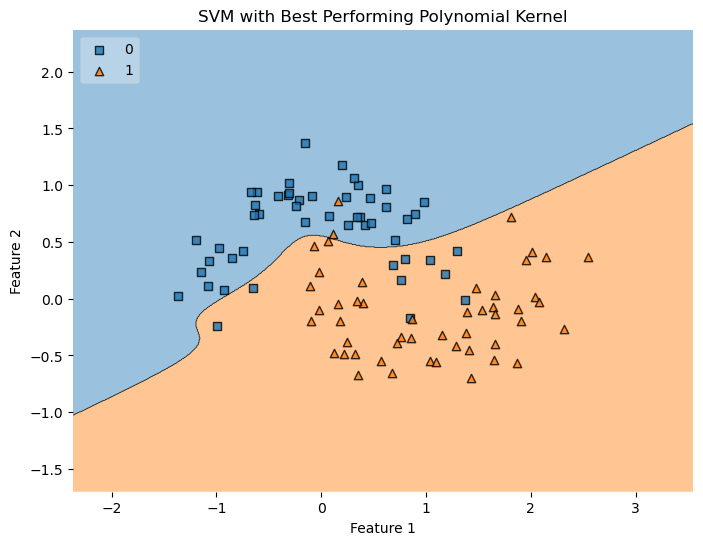

In [29]:
# Use the best performing kernel from GridSearchCV for polynomial kernel
best_kernel_poly = grid_poly.best_estimator_

# Print the hyperparameters of the best performing polynomial kernel
print("Best Hyperparameters (Poly):", best_kernel_poly.get_params())

# Plot decision boundary for the best performing polynomial kernel
plt.figure(figsize=(8, 6))
plot_decision_regions(X.values, y.values, clf=best_kernel_poly, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Best Performing Polynomial Kernel')
plt.show()


Best Hyperparameters (RBF): {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 5, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


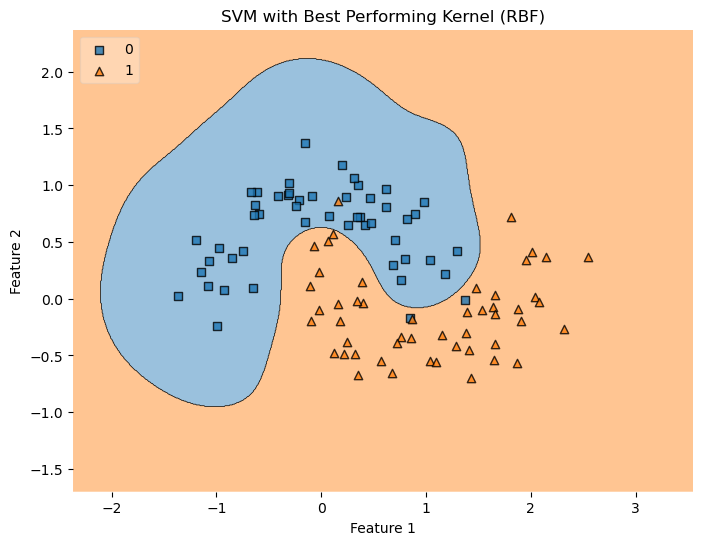

In [30]:
# Use the best performing kernel from GridSearchCV
best_kernel = grid_rbf.best_estimator_

# Print the hyperparameters of the best performing kernel
print("Best Hyperparameters (RBF):", best_kernel.get_params())

# Plot decision boundary for the best performing kernel
plt.figure(figsize=(8, 6))
plot_decision_regions(X.values, y.values, clf=best_kernel, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Best Performing Kernel (RBF)')
plt.show()

# Therefore, from the brief exploratory gridsearch of some of the possible hyperparameters and kernals, radial basis function scored the best as compared to linear and polynomial kernals. The respective hyperparameters for this best performing RDF are `C = 1` and `gamma/Γ = 5` that resulted in a score of 0.96 or 96%.
# Additionally, the hyperparameters for the best performing polynomial kernal are `C = 10` and `degree = 5` that resulted in a score of 0.9 or 90%.
# This score simply represents the accuracy of the classification model which is calculated as such: 
# `score = number of correct predictions / total number of predictions`